The principle of projection onto the orthogonal complement is central to how the spatial Interference Canceling Matched Filter (ICMF) and the LMMSE filter work in this context.

### Understanding the Orthogonal Projection

When dealing with vectors $ \mathbf{h} $ and $ \mathbf{h}^\perp $ in a vector space, $ \mathbf{h}^\perp $ represents the subspace that is orthogonal to $ \mathbf{h} $. Here's a deeper look at what happens:

1. **Orthogonal Complement**: $ \mathbf{h}^\perp $ is defined such that any vector in this subspace is orthogonal to any vector in the subspace spanned by $ \mathbf{h} $. Mathematically, for any vector $ \mathbf{v} $ in the subspace of $ \mathbf{h} $, the dot product $ \mathbf{h}^{\perp H} \mathbf{v} = 0 $. This orthogonality condition implies that there is no projection of $ \mathbf{h} $ onto $ \mathbf{h}^\perp $ and vice versa.

2. **Application in Filters**:
   - **Spatial Matched Filter** $ \mathbf{h}^H $: This filter projects the received signal $ \mathbf{y}[k] $ onto the direction of $ \mathbf{h} $, effectively extracting the component of the signal that aligns with $ \mathbf{h} $. This component is assumed to carry the desired signal $ d[k] $.
   - **Orthogonal Complement Filter** $ \mathbf{h}^{\perp H} $: This filter projects $ \mathbf{y}[k] $ onto the space orthogonal to $ \mathbf{h} $. The output $ \mathbf{x}[k] $ contains components of the received signal that are orthogonal to $ \mathbf{h} $, primarily capturing noise and any other signal components not aligned with $ \mathbf{h} $.

3. **Noise and Signal Separation**: The use of these orthogonal projections helps separate the desired signal from noise and interference. The orthogonal projection ensures that the interference captured by $ \mathbf{h}^{\perp H} $ does not affect the output of $ \mathbf{h}^H $, thus enhancing the purity of the desired signal extraction.

### LMMSE Filter in the Context of Orthogonal Projection

In the LMMSE filter:
$ \mathbf{f}^o = (\mathbf{h}^H R_{\mathbf{VV}} \mathbf{h}^\perp) (\mathbf{h}^{\perp H} R_{\mathbf{VV}} \mathbf{h}^\perp)^{-1} $

- The matrix $ \mathbf{h}^H R_{\mathbf{VV}} \mathbf{h}^\perp $ essentially tries to find a transformation that aligns the noise and interference (filtered through $ \mathbf{h}^{\perp} $) with the desired signal direction ($ \mathbf{h} $), but due to orthogonality, this ideally becomes zero indicating no alignment. If not zero, it corrects for any residual correlations due to imperfect orthogonalization or system modeling errors.
- The inversion of $ \mathbf{h}^{\perp H} R_{\mathbf{VV}} \mathbf{h}^\perp $ calculates the effective filter that needs to be applied to $ \mathbf{x}[k] $ to optimally estimate $ d[k] $ while minimizing error caused by noise and other orthogonal interference.

Thus, the projection onto the orthogonal complement is not just a separation technique but also a way to optimize the estimation of the desired signal in the presence of noise and interference by minimizing cross-coupling and enhancing the desired signal's purity.

In [1]:
using LinearAlgebra

In [2]:
# Function to calculate projection
function projection(v, u)
    return ((v ⋅ u) / (u ⋅ u)) * u
end

projection (generic function with 1 method)

In [3]:
# Define a 2-dimensional signal vector (example)
signal = [3, 4]

# Define a vector h that represents our desired direction
h = [1, 0]

# Compute the orthogonal complement of h
# For simplicity in 2D, if h = [a, b], then h_perp can be [-b, a] or [b, -a]
hꜜ = [0, 1]

2-element Vector{Int64}:
 0
 1

In [4]:
# Calculate projections
projection_h = projection(signal, h)
projection_hꜜ = projection(signal, hꜜ)

2-element Vector{Float64}:
 0.0
 4.0

In [5]:
# Output the results
println("Original Signal: ", signal)
println("Projection onto h: ", projection_h)
println("Projection onto h_perp: ", projection_hꜜ)
println("Reconstructed Signal: ", projection_h + projection_hꜜ)

Original Signal: [3, 4]
Projection onto h: [3.0, 0.0]
Projection onto h_perp: [0.0, 4.0]
Reconstructed Signal: [3.0, 4.0]


In [6]:
using Plots
using LaTeXStrings

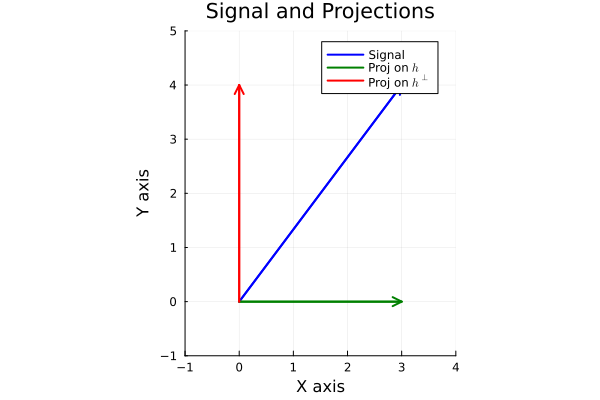

In [7]:
# Plot the original signal
plot([0, signal[1]], [0, signal[2]], label="Signal", arrow=true, linewidth=2, color=:blue)

# Plot projection onto h
plot!([0, projection_h[1]], [0, projection_h[2]], label=L"Proj on $h$", arrow=true, linewidth=2, color=:green)

# Plot projection onto h_perp
plot!([0, projection_hꜜ[1]], [0, projection_hꜜ[2]], label=L"Proj on $h^\perp$", arrow=true, linewidth=2, color=:red)

# Enhance plot features
plot!(
      xlim=(-1, 4), ylim=(-1, 5)
    , xlabel="X axis", ylabel="Y axis"
    , title="Signal and Projections", legend=:topright, aspect_ratio=:equal
)